# Rainfall Weather Forecasting

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#to view figures locally
import plotly.offline as py  
import plotly.graph_objs as go
from plotly.figure_factory import create_table

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.ensemble import GradientBoostingRegressor


#To check model accuracy, errors and validations
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Exploratory Data Analysis (EDA)

In [4]:
# Checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.shape

(8425, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
print("Min. Date :", df["Date"].min())

print("Max. Date :", df["Date"].max())

Min. Date : 2008-12-01
Max. Date : 2017-06-25


In [8]:
# converting the datatype of Date column from object to datetime

df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

In [9]:
#Checking for missing values

missing_values = df.isnull().sum()

missing_values

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Evaporation, Sunshine, Pressure Readings, Cloud Coverage, Wind Data, and Rainfall Data all have missing data in varrying capacities

In [10]:
numerical_features = df.select_dtypes(include=['float64']).columns

categorical_features = df.select_dtypes(include=['object']).columns


In [11]:
# Fill missing values with their mode since they are object type

for column in categorical_features:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [12]:
# For numerical variables, fill missing values with the median of the column

for column in numerical_features:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [13]:
# To confirm imputation of missing value

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.194255,23.855988,2.725982,5.060332,8.138409,40.036320,13.840000,18.539585,67.823739,51.246766,1017.649519,1015.246030,4.691157,4.647953,17.762267,22.436748
std,5.379497,6.114697,10.319872,3.871619,2.875324,13.781296,10.128896,9.704899,16.774237,18.311914,6.275796,6.217494,2.437110,2.310476,5.608301,5.946128
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,8.400000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.300000,28.000000,0.800000,5.200000,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


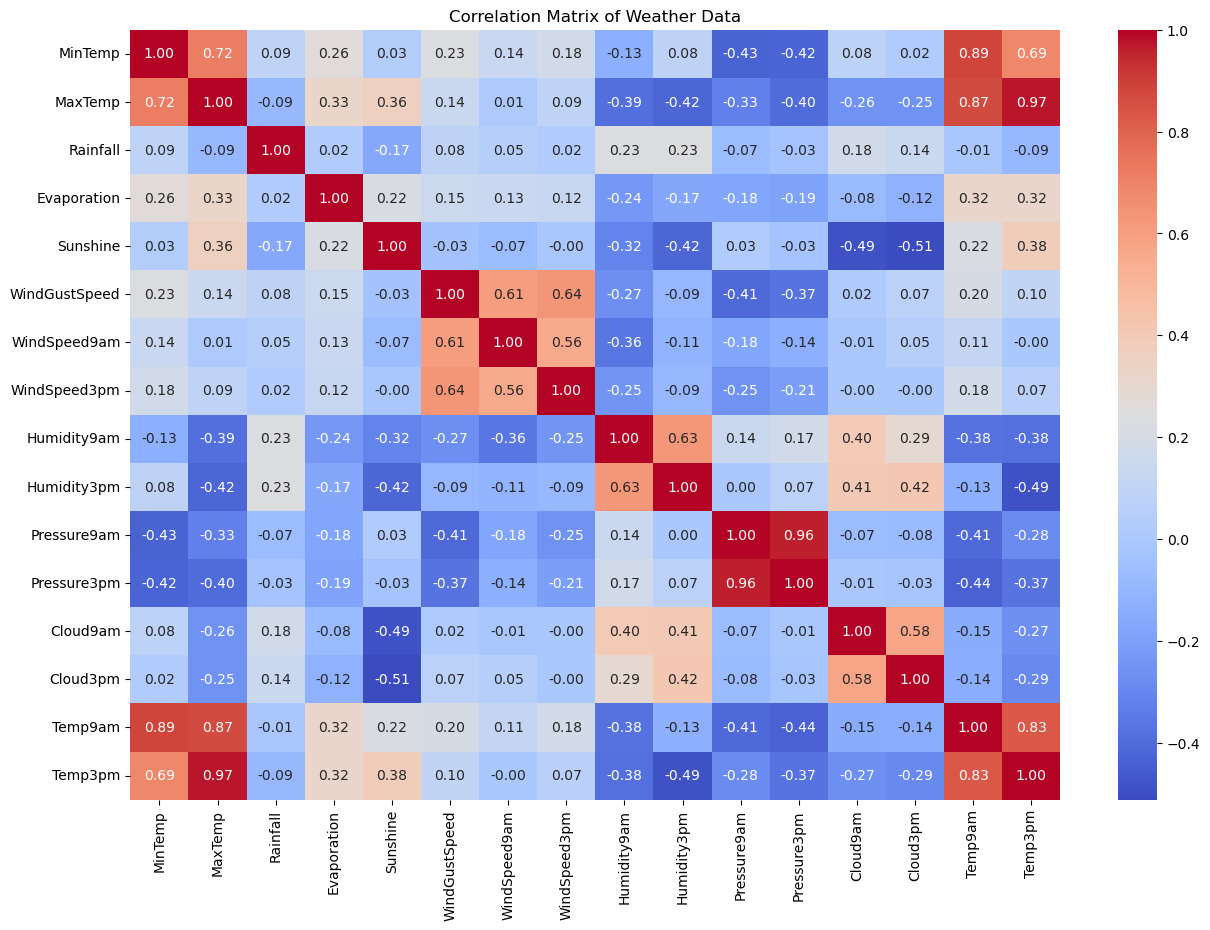

In [15]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Weather Data")
plt.show()

key observasions from above


There's a strong positive correlation between temperature variables like MinTemp, MaxTemp, Temp9am, and Temp3pm. This suggests that days with higher minimum temperatures tend to have higher maximum temperatures and vice versa.

There's a notable negative correlation between temperature variables and pressure readings (Pressure9am and Pressure3pm). This implies that higher temperatures tend to be associated with lower atmospheric pressure.

Humidity at 3 pm (Humidity3pm) shows a negative correlation with most temperature variables, indicating that higher temperatures often correspond with lower humidity levels in the afternoon.

There's a positive correlation between Rainfall and Humidity9am. More rainfall typically increases morning humidity.

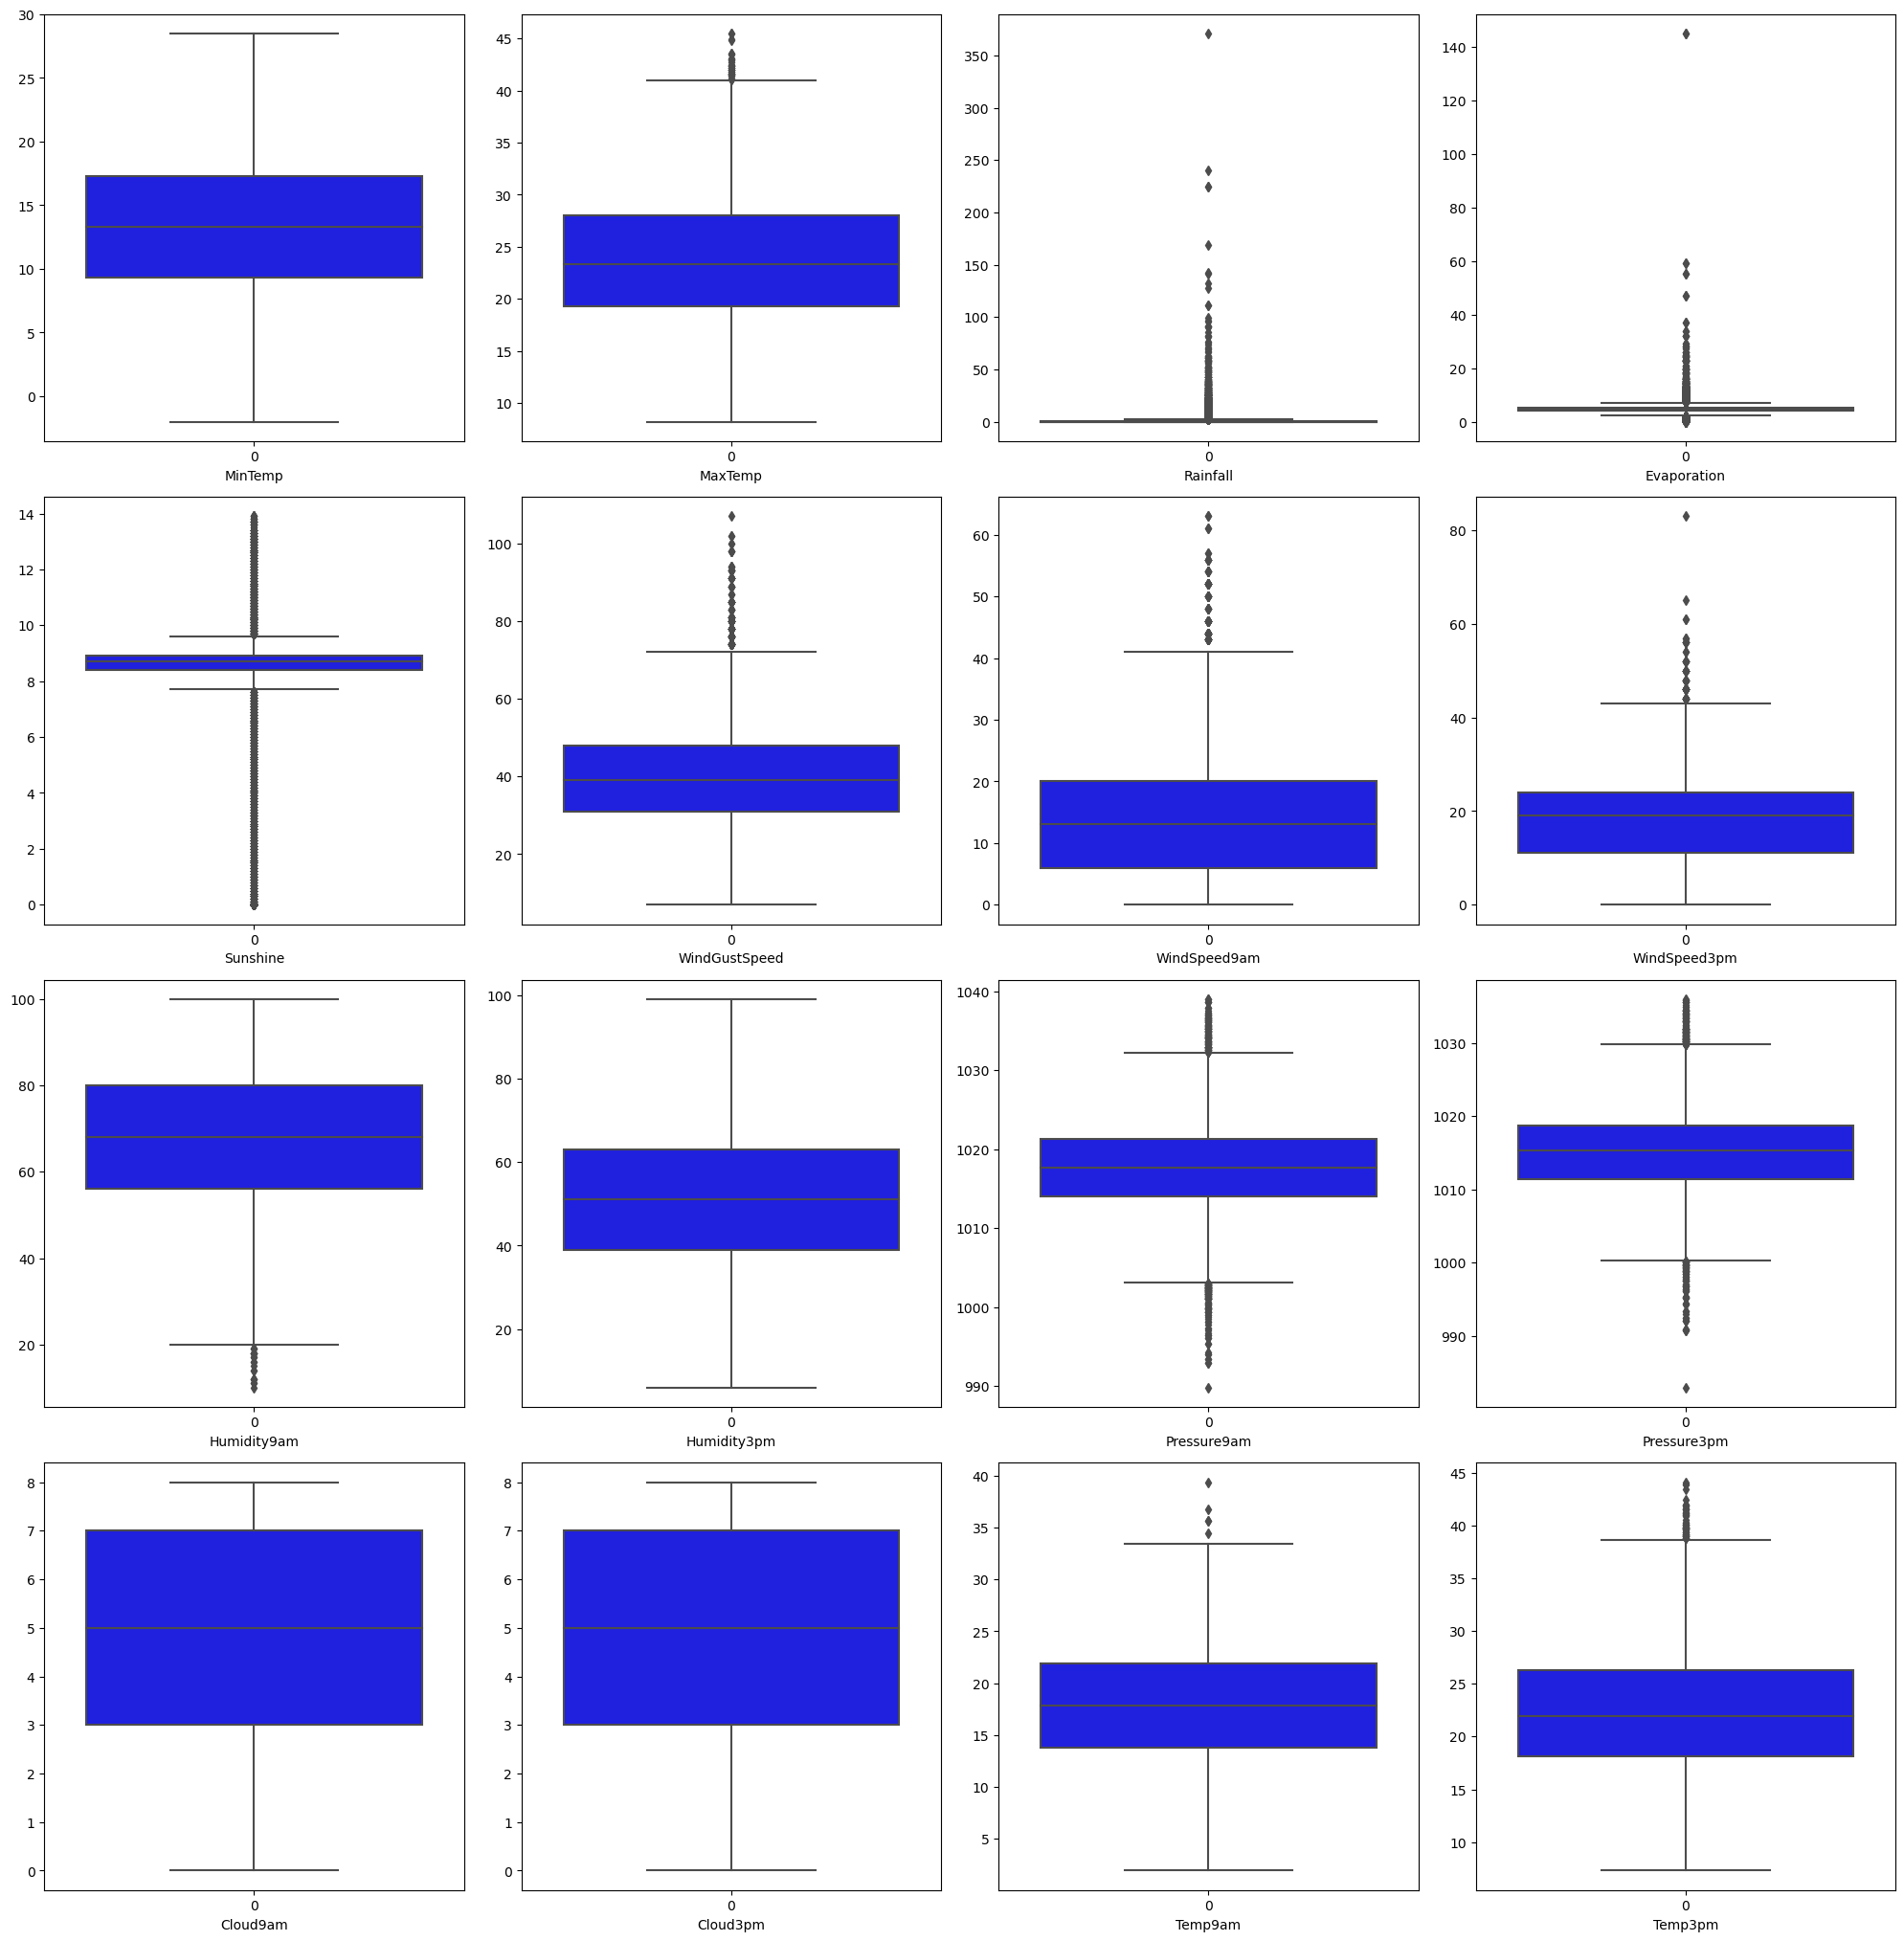

In [16]:
# To check outliers


# Select only numerical columns 
#numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

plt.figure(figsize=(20, 25))
G = 1
for i in numerical_features:
    if G <= 17:  # Plotting for the first 10 numerical columns
        plt.subplot(5, 4, G)
        sns.boxplot(df[i], color="blue")
        plt.xlabel(i)
    G += 1

plt.tight_layout()
plt.show()


from the above, we found outlier in some columns. Although outliers in weather data can mean extreme weather condictions

so, removing the outliers using zscore

In [17]:
# removing the outliers using zscore techniques 

from scipy.stats import zscore

out_features = df[['MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]

z=np.abs(zscore(out_features))

In [18]:
# using 3 as the threshold. any value more than 3 is considered as an outlier. from the standard deviation

np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   67,   68,   68,  123,  267,  296,  381,  381,
         405,  405,  406,  406,  407,  407,  563,  568,  568,  569,  602,
         683,  683,  748,  748,  980,  980, 1189, 1535, 1587, 1644, 1665,
        1898, 1903, 1945, 2016, 2028, 2043, 2074, 2186, 2219, 2219, 2230,
        2500, 2505, 2527, 2527, 2827, 2835, 2849, 2855, 2859, 2863, 2869,
        2877, 2883, 2891, 2897, 2905, 2911, 2919, 2925, 2933, 2939, 2947,
        2953, 2961, 2967, 2975, 2989, 3051, 3058, 3059, 3059, 3060, 3066,
        3067, 3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099,
        3099, 3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178,
        3185, 3206, 3212, 3212, 3213, 3221, 3227, 3234, 3248, 3260, 3271,
        3278, 3278, 3291, 3291, 3302, 3302, 3303, 3449, 3449, 3449, 3450,
        3450, 3458, 3471, 3491, 3557, 3602, 3603, 3617, 3679, 3687, 3701,
        3707, 3711, 3715, 3721, 3729, 

In [19]:
# keeping all the columns where the z value is less than 3

weather_df = df[(z<3).all(axis=1)]

weather_df.shape

(8095, 23)

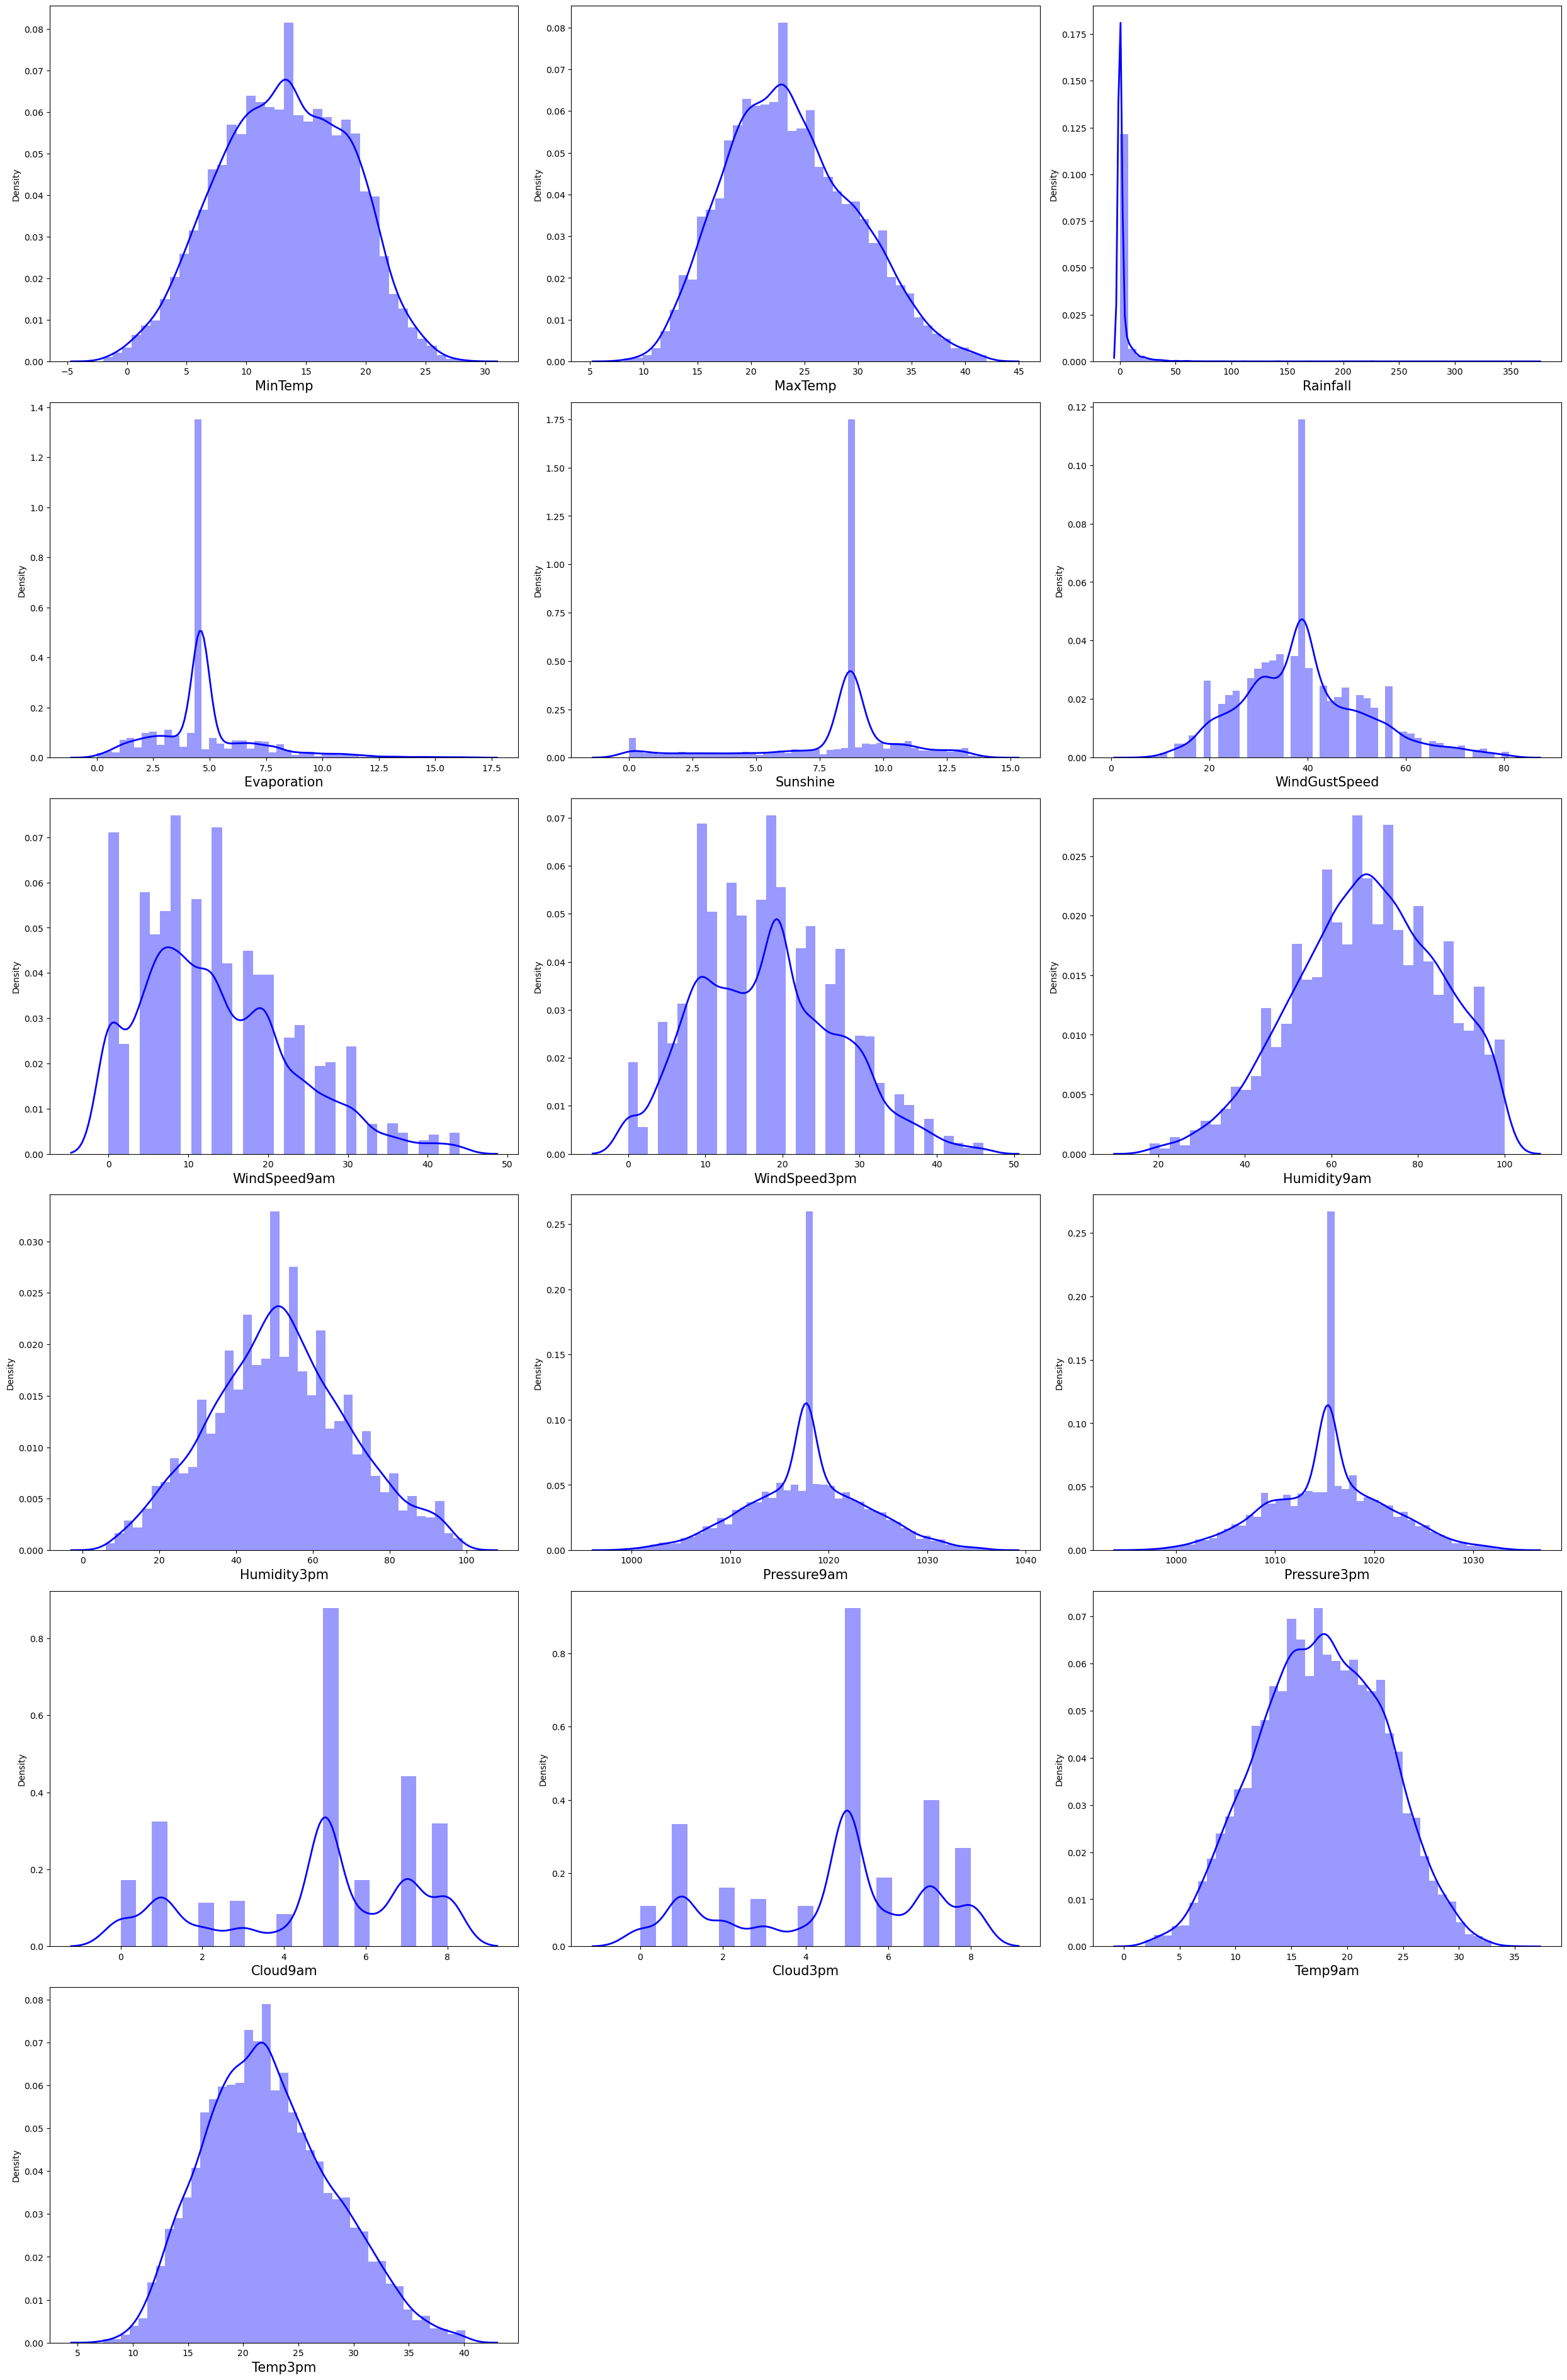

In [20]:
# Check for Skewness
# Filter only numeric columns
numeric_features = weather_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(25, 50))
position = 1

for feature in numeric_features:
    if position <= 17:
        ax = plt.subplot(8, 3, position)
        sns.distplot(weather_df[feature], color='b', kde_kws={"lw": 2})
        plt.xlabel(feature, fontsize=15)
        position += 1

plt.tight_layout()
plt.show()


In [21]:
weather_df.skew()

MinTemp          -0.095082
MaxTemp           0.323840
Rainfall         13.877750
Evaporation       1.281752
Sunshine         -1.203753
WindGustSpeed     0.542084
WindSpeed9am      0.714718
WindSpeed3pm      0.299030
Humidity9am      -0.237450
Humidity3pm       0.126380
Pressure9am       0.019974
Pressure3pm       0.042349
Cloud9am         -0.512319
Cloud3pm         -0.453248
Temp9am          -0.038857
Temp3pm           0.344700
dtype: float64

In [22]:
# Removing skewness in volume column using cuberoot method

weather_df['Rainfall'] = np.cbrt(weather_df['Rainfall'])
weather_df['Evaporation'] = np.cbrt(weather_df['Evaporation'])
weather_df['Sunshine'] = np.cbrt(weather_df['Sunshine'])

In [23]:
# Encode categorical variables
label_encoders = {}

for column in categorical_features:
    label_encoders[column] = LabelEncoder()
    weather_df[column] = label_encoders[column].fit_transform(weather_df[column])

In [24]:
# Extracting year, month, and day from the 'Date' column

weather_df['Year'] = weather_df['Date'].dt.year
weather_df['Month'] = weather_df['Date'].dt.month
weather_df['Day'] = weather_df['Date'].dt.day

# Dropping the original 'Date' column as it's not needed anymore
weather_df.drop('Date', axis=1, inplace=True)


In [25]:
weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.843433,1.663103,2.05671,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.000000,1.663103,2.05671,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.000000,1.663103,2.05671,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.000000,1.663103,2.05671,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.000000,1.663103,2.05671,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [26]:
# Let's Prepare the dataset for model training
# Defining target variable for predicting rain tomorrow

y_rain_tomorrow = weather_df['RainTomorrow']
X_rain_tomorrow = weather_df.drop('RainTomorrow', axis=1)


In [27]:
X_rain_tomorrow.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1,13.4,22.9,0.843433,1.663103,2.05671,13,44.0,13,14,...,1007.7,1007.1,8.0,5.0,16.9,21.8,0,2008,12,1
1,1,7.4,25.1,0.000000,1.663103,2.05671,14,44.0,6,15,...,1010.6,1007.8,5.0,5.0,17.2,24.3,0,2008,12,2
2,1,12.9,25.7,0.000000,1.663103,2.05671,15,46.0,13,15,...,1007.6,1008.7,5.0,2.0,21.0,23.2,0,2008,12,3
3,1,9.2,28.0,0.000000,1.663103,2.05671,4,24.0,9,0,...,1017.6,1012.8,5.0,5.0,18.1,26.5,0,2008,12,4
4,1,17.5,32.3,1.000000,1.663103,2.05671,13,41.0,1,7,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,2008,12,5


In [28]:
y_rain_tomorrow.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

In [29]:
scaler = StandardScaler()

X_rain = pd.DataFrame(scaler.fit_transform(X_rain_tomorrow), columns = X_rain_tomorrow.columns)


In [30]:
# Data splitting for classification task

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_rain, y_rain_tomorrow, test_size=0.2, random_state=42)


In [31]:
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(3),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "GaussianNB": GaussianNB(),
}

classifier_metrics = {}  

# Training and evaluating each model
for model_name, model in classifiers.items():
    # Training the model
    model.fit(X_train_c, y_train_c)
    
   
    # Making predictions on the testing data
    y_pred = model.predict(X_test_c)
    
    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test_c, y_pred)
    precision = precision_score(y_test_c, y_pred, average='weighted') 
    recall = recall_score(y_test_c, y_pred, average='weighted')       
    f1 = f1_score(y_test_c, y_pred, average='weighted')                
    
    # Storing the metrics in the dictionary
    classifier_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Converting the dictionary to a DataFrame for easier comparison
model_comparison = pd.DataFrame(classifier_metrics).T

model_comparison


[LightGBM] [Info] Number of positive: 1506, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2258
[LightGBM] [Info] Number of data points in the train set: 6476, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232551 -> initscore=-1.193963
[LightGBM] [Info] Start training from score -1.193963


,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.822112,0.810757,0.822112,0.803996
LGBMClassifier,0.875232,0.873229,0.875232,0.866435
KNeighborsClassifier,0.805435,0.790426,0.805435,0.791859
DecisionTreeClassifier,0.855466,0.852740,0.855466,0.853871
RandomForestClassifier,0.887585,0.889090,0.887585,0.879000
AdaBoostClassifier,0.835083,0.826715,0.835083,0.819794
GradientBoostingClassifier,0.848672,0.845242,0.848672,0.833389
XGBClassifier,0.893144,0.890937,0.893144,0.888129
GaussianNB,0.799876,0.805414,0.799876,0.802346


In [32]:
# Hypertuning our LGBMClassifier, our best model
model = XGBClassifier()

param_grid = {'learning_rate' : [0.01, 0.1, 0.2], 'max_depth': [3,4,5], 'min_samples_leaf': [1,2],
         'min_samples_split': [2,3], 'n_estimators': [10,50,100]}

grid_search = GridSearchCV(model,param_grid)
GS = grid_search.fit(X_train_c, y_train_c)
best_model = GS.best_params_
best_score = GS.best_score_

(best_model, best_score)

({'learning_rate': 0.2,
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.8766199532866199)


Regression Task

In [33]:
# Let's Prepare the dataset for model training
# Defining target variable for predicting the amount of rain tomorrow

y_rainfall_amount = weather_df['Rainfall']
X_rainfall_amount = weather_df.drop('Rainfall', axis=1)

In [34]:
X_rainfall_amount.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,1.663103,2.05671,13,44.0,13,14,20.0,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,1.663103,2.05671,14,44.0,6,15,4.0,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,1.663103,2.05671,15,46.0,13,15,19.0,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,1.663103,2.05671,4,24.0,9,0,11.0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.663103,2.05671,13,41.0,1,7,7.0,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [35]:
y_rainfall_amount.head()

0    0.843433
1    0.000000
2    0.000000
3    0.000000
4    1.000000
Name: Rainfall, dtype: float64

In [36]:
# Scaling our data
scaler = StandardScaler()

X_amount = pd.DataFrame(scaler.fit_transform(X_rainfall_amount), columns = X_rainfall_amount.columns)


In [37]:
# Data splitting for regression task

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_amount, y_rainfall_amount, test_size=0.2, random_state=42)

In [38]:

# Initialize regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVM Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "Ridge Regression": Ridge()
}

# Train and evaluate each regressor
regression_results = {}
for name, reg in regressors.items():
    reg.fit(X_train_r, y_train_r)
    y_pred_r = reg.predict(X_test_r)
    regression_results[name] = {
        "MSE": mean_squared_error(y_test_r, y_pred_r),
        "RMSE": mean_squared_error(y_test_r, y_pred_r, squared=False),
        "MAE": mean_absolute_error(y_test_r, y_pred_r),
        "R2 Score": r2_score(y_test_r, y_pred_r)
    }

# Convert the results to a DataFrame
regression_results_df = pd.DataFrame(regression_results)

regression_results_df


,Linear Regression,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,SVM Regressor,KNN Regressor,Ridge Regression
MSE,0.154605,0.198383,0.112367,0.141028,0.142209,0.184784,0.154598
RMSE,0.393198,0.445402,0.335212,0.375537,0.377107,0.429865,0.393189
MAE,0.250565,0.197293,0.194232,0.230184,0.222014,0.242220,0.250572
R2 Score,0.793189,0.734628,0.849689,0.811350,0.809770,0.752819,0.793199


In [39]:
# Using 'GridSearchCV' to find the best hyperparameters for the best model:
from sklearn.model_selection import GridSearchCV
rf_reg = RandomForestRegressor()
parameters = {
    "n_estimators" : [3, 6, 9],
    "max_depth" : [1, 2, 3, 4],
}
 
clf = GridSearchCV(rf_reg, parameters)
clf.fit(X_train_r, y_train_r)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4], 'n_estimators': [3, 6, 9]})